# PAPER: REGRESSION MODELLING
# NAME : NILANJANA DEY
# REGISTER NO: 23122024
# CLASS : MSC-DS-A
# TOPIC : MULTIPLE LINEAR REGRESSION

## * THEORITICAL BACKGROUND *

#### Multiple Linear Regression (MLR) is a statistical technique that models the relationship between a dependent variable and two or more independent variables by fitting a linear equation to the observed data. The general purpose of MLR is to understand the relationship between the dependent variable and the independent variables and to predict the dependent variable based on new observations of the independent variables.

### ** Key Concepts of MLR **

Dependent Variable (Y): The variable you are trying to predict or explain.
Independent Variables (X1, X2, ..., Xn): The variables you are using to predict the dependent variable.
Regression Coefficients (β0, β1, ..., βn): The parameters of the model that represent the relationship between each independent variable and the dependent variable.
The MLR Equation : 

The MLR model is represented by the following equation:
Y=β0+β1X1+β2X2+…+βn​Xn+ϵ

Where:

Y is the dependent variable.

X1,X2,…,Xn are the independent variables.

β0 is the intercept (constant term).

β1,β2,…,βn are the coefficients for each independent variable.

ϵ is the error term (residuals).

### **Assumptions of MLR :**

Linearity: The relationship between the dependent variable and each independent variable is linear.

Independence: The residuals (errors) are independent.

Homoscedasticity: The variance of the residuals is constant across all levels of the independent variables.

Normality: The residuals are normally distributed.

No Multicollinearity: The independent variables are not highly correlated with each other.

### **Steps to Perform MLR**

Data Preparation: Gather and clean the data, ensuring no missing values or outliers.

Exploratory Data Analysis (EDA): Understand the relationships and distributions of the variables.

Split the Data: Divide the data into training and testing sets.

Fit the Model: Use the training data to fit the MLR model.

Evaluate the Model: Use the testing data to evaluate the model's performance using metrics such as RMSE, R², adjusted R², etc.

Residual Analysis: Check the assumptions of MLR by analyzing the residuals.

## DATA PREPARATION 

Dataset : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data

**Data Description :**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Performing EDA :** 

Checking data type of each column

Checking for missing values

Checking for duplicates

Checking for correlation amongst the features

Choosing the target variable and the independant features

In [17]:
import pandas as pd

df=pd.read_csv("house_price.csv")

In [ ]:
df.head()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
df.shape

(21613, 21)

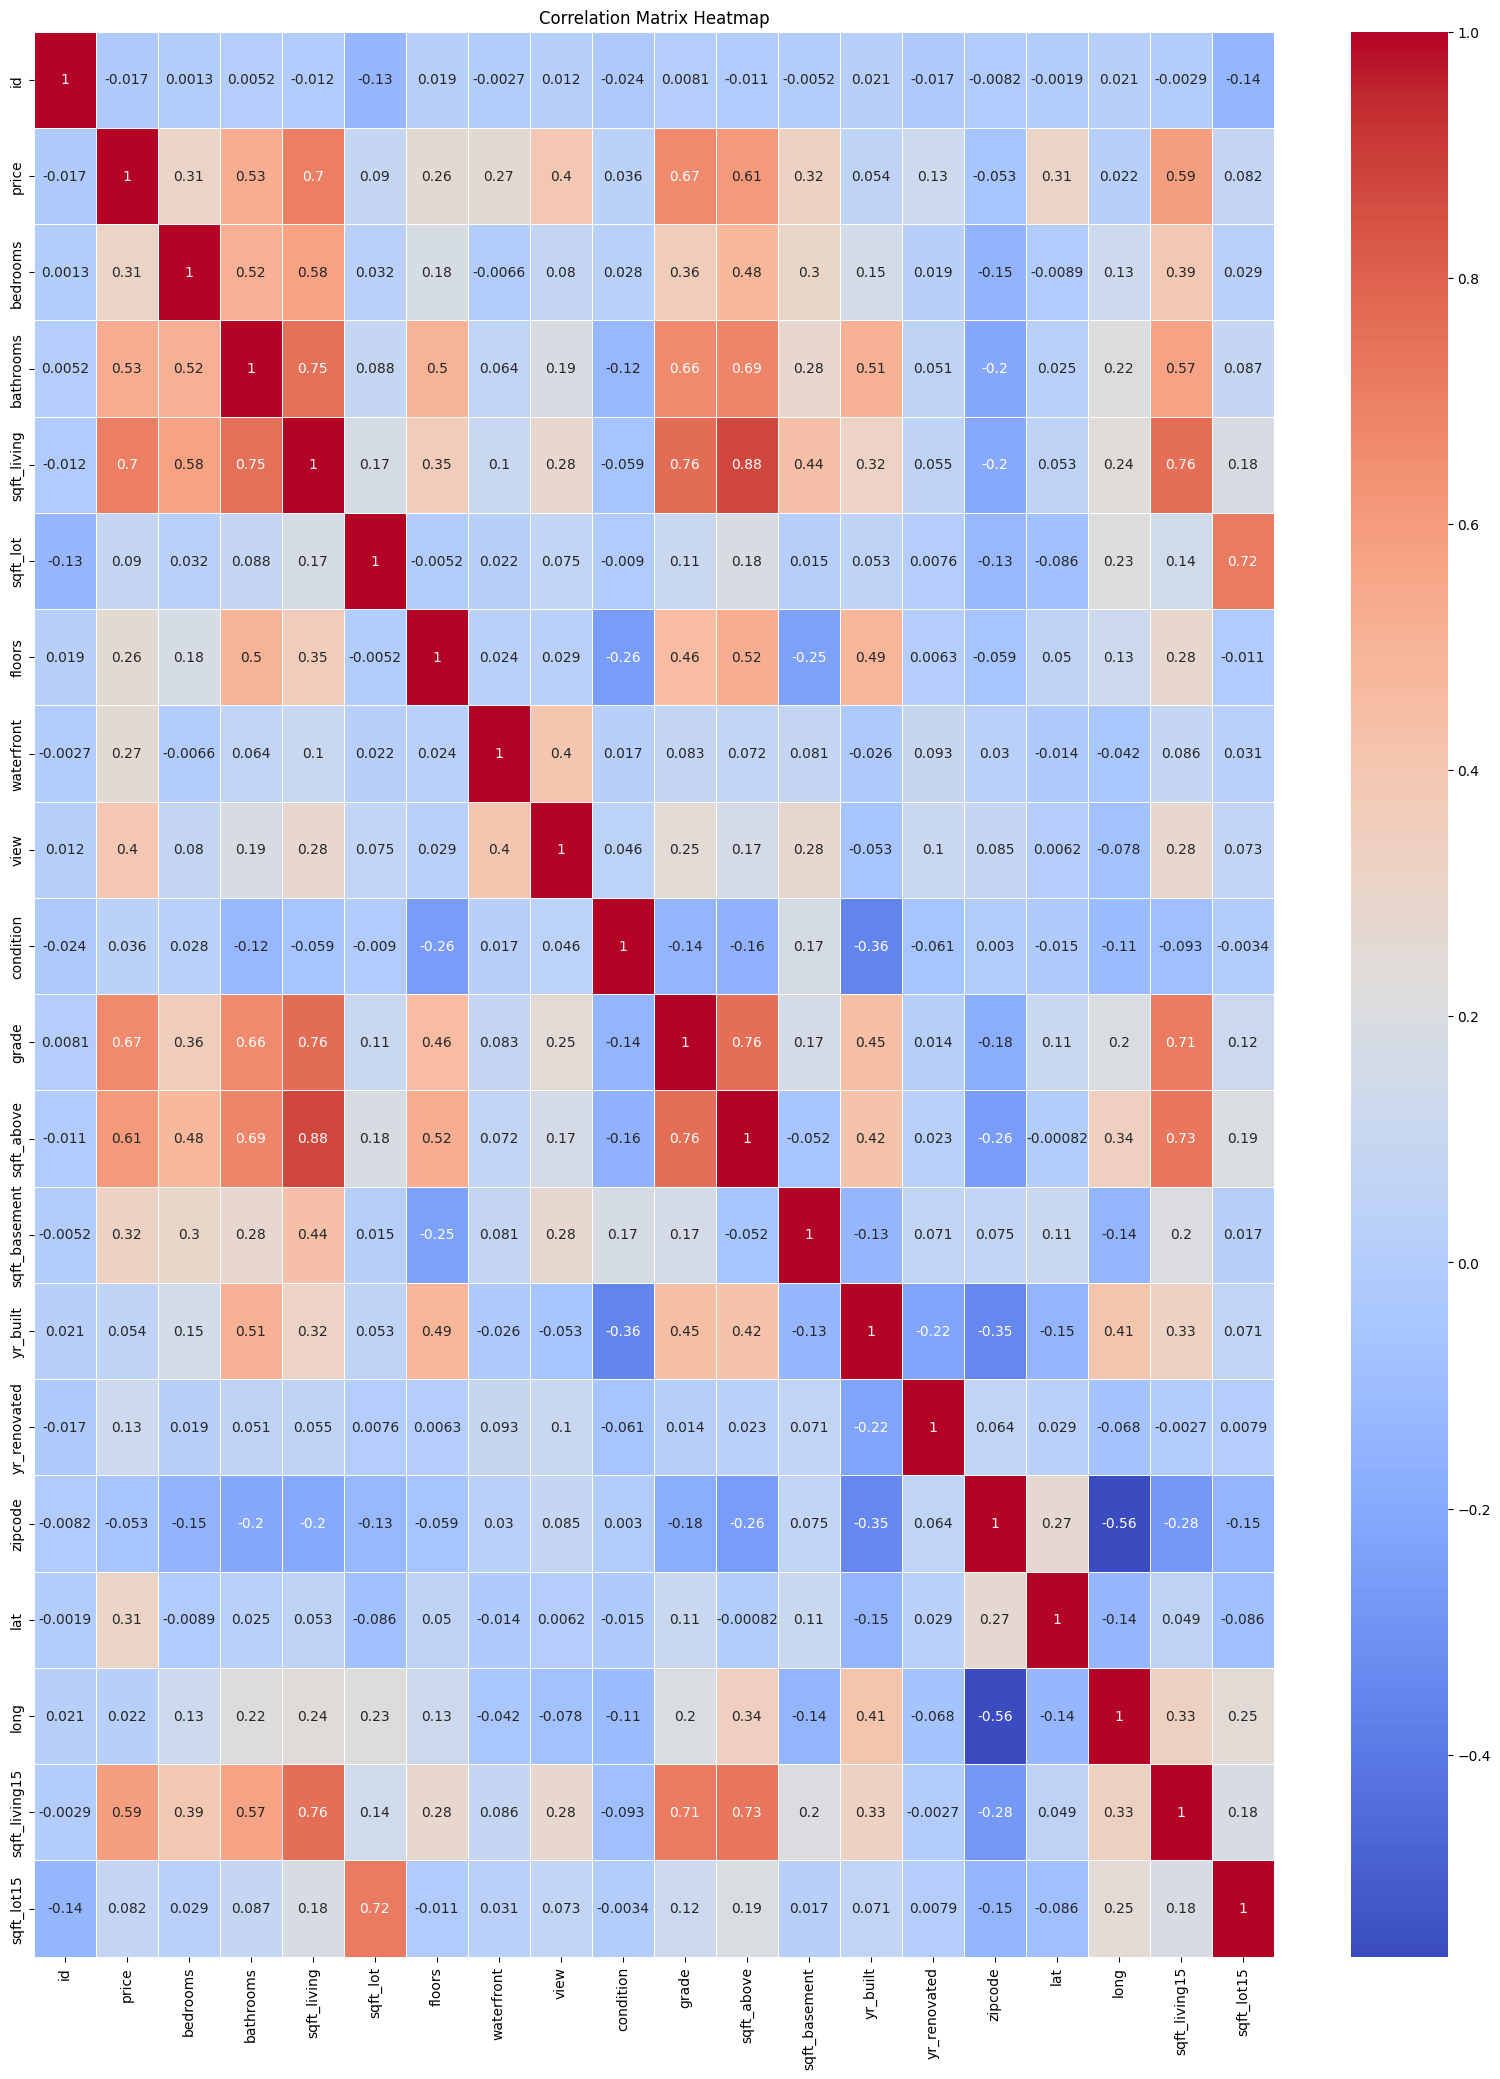

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix

# Select numerical columns
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()



# Create a heatmap
plt.figure(figsize=(20,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# INTERPRETATION : If we select our target variable as "price" then we can see that price column is correlated to 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'

## FEATURE SELECTION

Output Variable : Price

Independant variables : 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'

**The above independant variables are selected after checking the multicollinearity using VIF values. The VIF values for the above features is <5.**

**VIF (Variance Inflation Factor)** is a measure used to detect multicollinearity in regression analysis. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated with each other, leading to inflated standard errors and potentially misleading interpretations of the regression coefficients. VIF quantifies how much the variance of an estimated regression coefficient is increased because of multicollinearity.

Interpreting VIF Values:

VIF = 1: No multicollinearity. The variance of the coefficient is not inflated at all.
VIF > 1 and < 5: Moderate multicollinearity. The variance of the coefficient is moderately inflated.
VIF > 5: High multicollinearity. The variance of the coefficient is significantly inflated, indicating a problem with multicollinearity.

In [26]:


import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


df = pd.DataFrame(df)

# Selecting only numerical columns
X = df.select_dtypes(include=['number'])

# Adding a constant column for the intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF values for the features:")
print(vif_data)


c:\Users\NILANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\NILANJANA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


VIF values for the features:
          Feature       VIF
0           const  0.000000
1              id  1.028542
2           price  3.331694
3        bedrooms  1.679425
4       bathrooms  3.375628
5     sqft_living       inf
6        sqft_lot  2.109017
7          floors  2.012361
8      waterfront  1.266565
9            view  1.477161
10      condition  1.257240
11          grade  3.733488
12     sqft_above       inf
13  sqft_basement       inf
14       yr_built  2.577625
15   yr_renovated  1.152429
16        zipcode  1.686153
17            lat  1.352876
18           long  1.853365
19  sqft_living15  2.985243
20     sqft_lot15  2.149183


In [35]:
# Correlation with the target
target_corr = correlation_matrix['price'].drop('price')

# Select features with a correlation greater than a threshold (e.g., 0.5)
threshold = 0.5
strong_corr_features = target_corr[abs(target_corr) > threshold].index.tolist()

print("Features with strong correlation to the target:")
print(strong_corr_features)


Features with strong correlation to the target:
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']


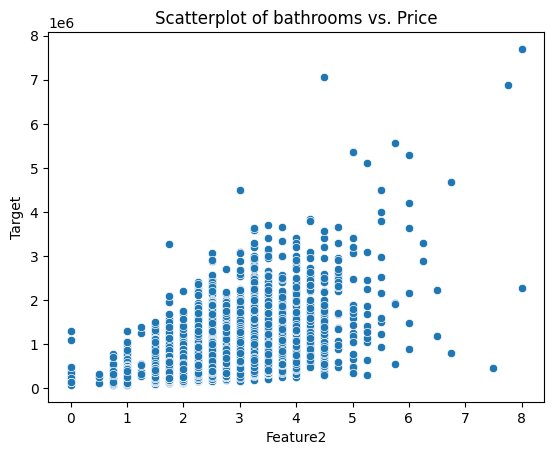

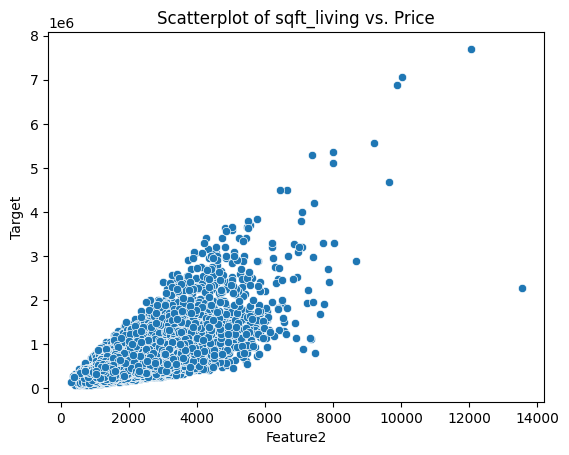

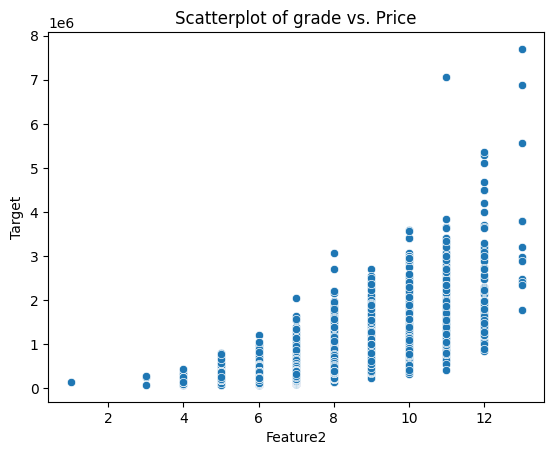

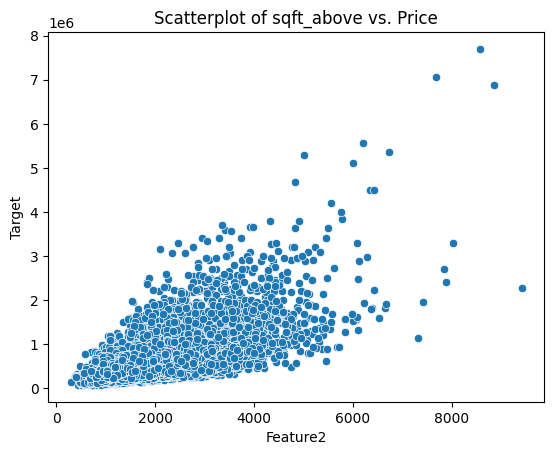

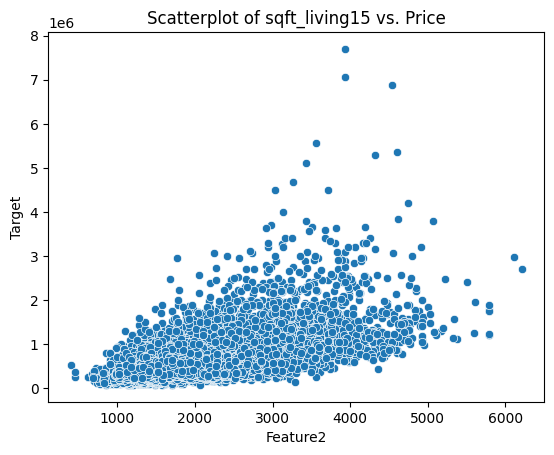

In [79]:
features=['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']

# Create scatterplot for feature2 vs. target

for column in features:
    sns.scatterplot(x=df[column], y='price', data=df)
    plt.title(f'Scatterplot of {column} vs. Price')
    plt.xlabel('Feature2')
    plt.ylabel('Target')
    plt.show()

## FEATURE SCALING

Feature scaling is a preprocessing step in machine learning that standardizes or normalizes the range of independent variables or features in the dataset. This is important because many machine learning algorithms perform better or converge faster when the features are on a similar scale. There are two common methods for feature scaling:

**Standardization (Z-score normalization):**

Standardization scales the features to have a mean of 0 and a standard deviation of 1.
It preserves the shape of the original distribution and does not bound the values to a specific range.
It is less affected by outliers compared to min-max scaling.

Formula: 

𝑧=(𝑥−𝜇)/𝜎

, where 

μ is the mean and 

σ is the standard deviation.

In [50]:
X=df[features]

In [51]:
X # this is scaled dataset containing the independant features


,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,2310,1830
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1600,1410


In [58]:
from sklearn.preprocessing import StandardScaler



# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
X= scaler.fit_transform(X)






In [55]:
X=pd.DataFrame(X)
X.columns=features
X

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,-1.447464,-0.979835,-0.558836,-0.734708,-0.943355
1,0.175607,0.533634,-0.558836,0.460841,-0.432686
2,-1.447464,-1.426254,-1.409587,-1.229834,1.070140
3,1.149449,-0.130550,-0.558836,-0.891699,-0.914174
4,-0.149007,-0.435422,0.291916,-0.130895,-0.272190
...,...,...,...,...,...
21608,0.500221,-0.598746,0.291916,-0.312039,-0.666135
21609,0.500221,0.250539,0.291916,0.629908,-0.228419
21610,-1.772078,-1.154047,-0.558836,-0.927928,-1.410253
21611,0.500221,-0.522528,0.291916,-0.227505,-0.841221


## TRAIN TEST SPLIT

The train-test split is a common technique used in machine learning to divide a dataset into two subsets: one for training the model and one for testing the model's performance.

## FITTING THE MODEL

We fit the linear regression line and calculate the intercept and regression coefficients

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler




# Separate features and target variable

y = df['price']  # Target variable

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the target variable and transform it
y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 0.060920019663143345
Coefficients: [-0.0032056   0.02952765  0.01671762 -0.00884139  0.00205298]


## PREDICTION BASED ON TEST DATA

In [64]:
y_pred=model.predict(X_test)

## MODEL EVALUATION METRICES

1) RMSE (Root Mean Squared Error) is a commonly used metric to evaluate the performance of a regression model. It measures the average magnitude of the errors between predicted and actual values. Lower RMSE values indicate better model performance.

2) MAE (Mean Absolute Error) is another commonly used metric to evaluate the performance of a regression model. It measures the average absolute difference between the predicted and actual values. Like RMSE, lower MAE values indicate better model performance.

3) R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model. It ranges from 0 to 1, with higher values indicating better fit of the model to the data.

4) Adjusted R-squared is a modified version of the R-squared value that adjusts for the number of predictors in the model. It penalizes the addition of unnecessary predictors that do not improve the model's performance. Adjusted R-squared typically provides a more accurate measure of the model's goodness of fit when comparing models with different numbers of predictors.

5) MASE (Mean Absolute Scaled Error) is a metric used to evaluate the accuracy of a time series forecasting model. It measures the mean absolute error of the forecasted values relative to a naïve forecast, scaled by the mean absolute error of a naïve forecast for the same series. MASE values less than 1 indicate that the model performs better than a naïve forecast, while values greater than 1 indicate worse performance.

6) MAPE : MAPE (Mean Absolute Percentage Error) is a metric used to evaluate the accuracy of a forecasting model. It measures the average absolute percentage difference between the predicted and actual values, relative to the actual values. MAPE is expressed as a percentage, and lower values indicate better accuracy.

In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r_squared)


RMSE: 0.034298761112248326
MAE: 0.021590203635828937
R-squared: 0.5481017682465567


In [66]:
n = len(y_test)
p = X.shape[1]  # Number of predictors/features

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.5475783744177942


In [67]:
# MASE (Mean Absolute Scaled Error)
mase = mae / np.mean(np.abs(np.diff(y_test)))

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MASE:", mase)
print("MAPE:", mape)


MASE: 0.4861667046902731
MAPE: 43.374164007973505


### Interpretation of evaluation metrics:

1) The RMSE and MAE values almost tend to 0 which states that the fitting is quite good.

2) R squared and Adjusted R squared values are somewhat moderate, around 0.54, that is, the model can predict the relationship between the variables by 54%.

3) The MAPE value shows that the error percentage is around 43% showing that the fitting is not so great.

## CALCULATING RESIDUALS

In [68]:
# Calculate residuals
residuals = y_test - y_pred


## RESIDUAL ANALYSIS

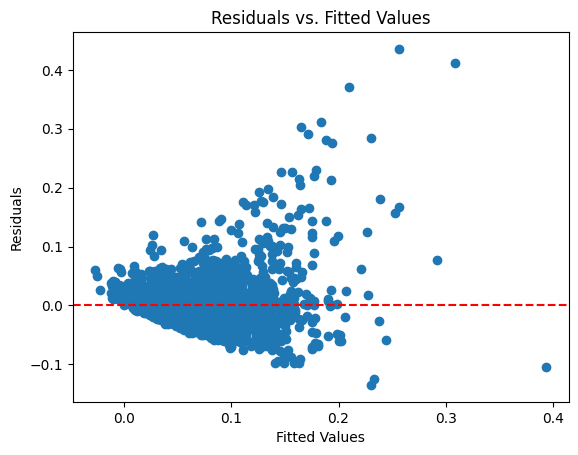

In [69]:
import matplotlib.pyplot as plt

# Plot residuals vs. fitted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


Interpretation : The above plot shows that the points scattered around the residual line is not quite random and shows a few outliers.

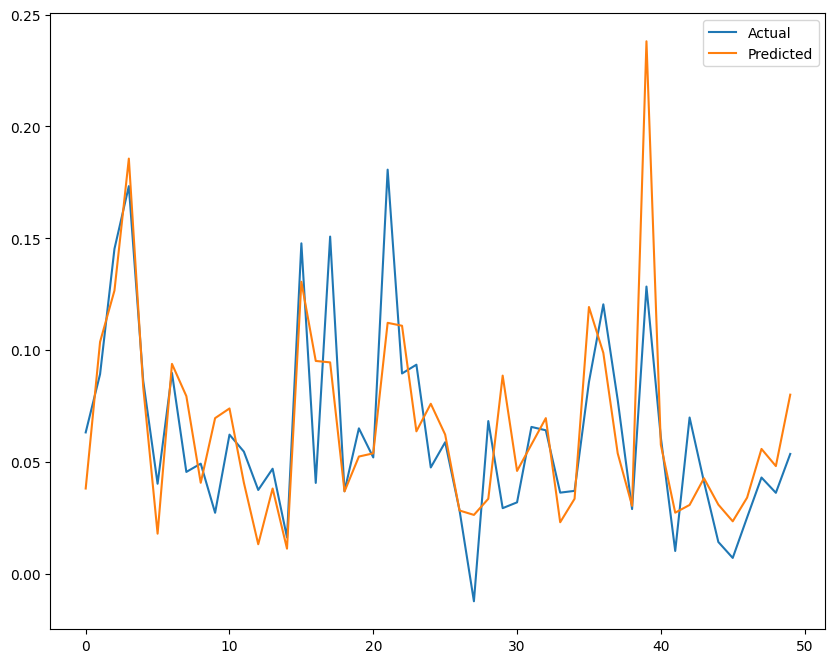

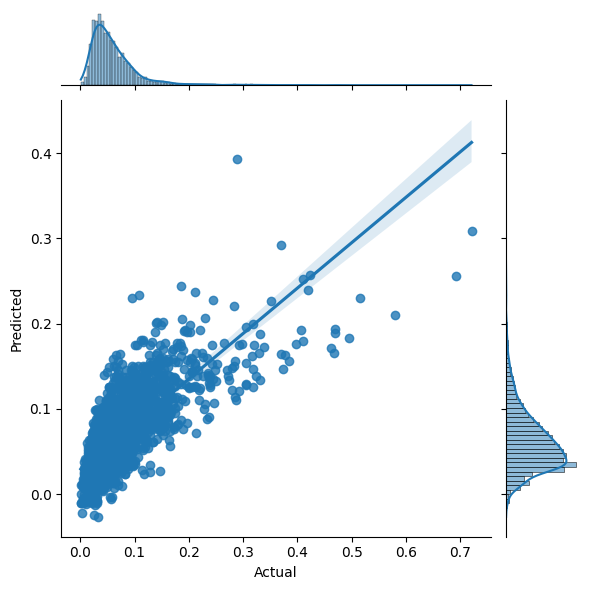

In [81]:
# Assuming y_test and y_pred2 are your actual and predicted values
y_test= np.ravel(y_test)
y_pred = np.ravel(y_pred)

test = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
fig= plt.figure(figsize=(10,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

Interpretation : The Predicted values are somewhat equal to the actual values indicating that the fitting is not so great.

### CHECK FOR NORMALITY OF THE ERRORS

Q-Q plot : 

A Q-Q (quantile-quantile) plot is a graphical tool used to assess whether a dataset follows a particular distribution, often the normal distribution. It compares the quantiles of the dataset against the quantiles of a theoretical distribution. If the points on the Q-Q plot fall approximately along a straight line, it suggests that the data follows the specified distribution.

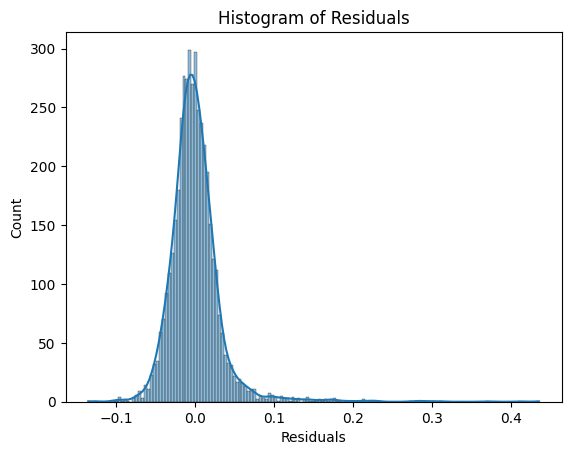

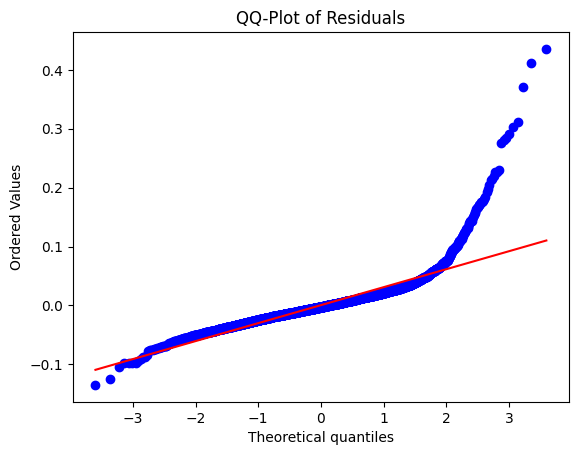

In [73]:
import seaborn as sns
import scipy.stats as stats

# Histogram of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# QQ-Plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.show()


Interpretation :

The errors are somewhat normally distributed as shown by the Q-Q plot and the histogram. The mean is around 0. Here also, we can spot certain outliers.

### CHECK FOR HOMOSCEDASTICITY

Homoscedasticity is an important assumption in linear regression and other statistical models, indicating that the variance of the errors (residuals) is constant across all levels of the independent variables. When this assumption is violated (heteroscedasticity), the estimates of the coefficients can be inefficient, and the standard errors can be biased, leading to invalid statistical inferences.

The **Breusch-Pagan test** is used to detect heteroscedasticity in a regression model. It tests whether the variance of the residuals from a regression is dependent on the values of the independent variables. If the test indicates heteroscedasticity, it suggests that the assumption of constant variance (homoscedasticity) is violated.

In [76]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, model.model.exog)

# The test returns a tuple: (Lagrange multiplier statistic, p-value, f-value, f p-value)
# We're interested in the p-value (index 1 of the tuple)
bp_pvalue = bp_test[1]

print('Breusch-Pagan test p-value:', bp_pvalue)


Breusch-Pagan test p-value: 0.0


Interpretation : Since the p-value is 0 we can understand that the error variance is not constant.

## CHECK FOR AUTOCORRELATION

The Durbin-Watson (DW) test is a statistical test used to detect the presence of autocorrelation (serial correlation) in the residuals of a regression analysis. Autocorrelation can violate the assumptions of ordinary least squares (OLS) regression and lead to inefficient estimates.

In [74]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw)


Durbin-Watson statistic: 2.009754136021061


Interpretation : Durbin-Watson Statistic value around 2 indicates no evidence of autocorrelation. Hence we can say that the errors are independant.

## VISUALIZATION OF OUTLIERS

 The below plot shows that the outliers are quite many in number and may cause the miscalculation of the regression line which in turn can increase the error in the model.

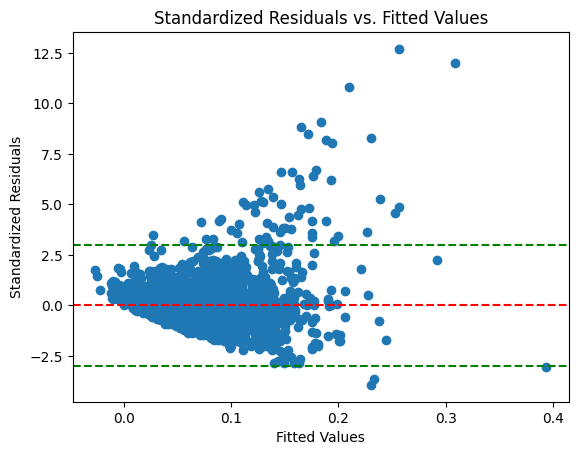

In [75]:
# Calculate standardized residuals
standardized_residuals = residuals / np.std(residuals)

# Plot standardized residuals
plt.scatter(y_pred, standardized_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=3, color='g', linestyle='--')
plt.axhline(y=-3, color='g', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs. Fitted Values')
plt.show()


## CONCLUSION 

1)  The independant feature columns should be have been transformed to get a normal distribution. This should have reduced the error and maintained homoscedasticity.

2) We could have performed principal component analysis and worked with few principal components to get a more compact fitting line to predict the house prices.

3) The current regression line is not a good fit as the residual analysis states that the errors are heteroscedastic.